In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
covid = pd.read_csv('https://opendata.ecdc.europa.eu/covid19/casedistribution/csv')

In [3]:
covid

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,11/12/2020,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,10/12/2020,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658
...,...,...,...,...,...,...,...,...,...,...,...,...
61895,25/03/2020,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61896,24/03/2020,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61897,23/03/2020,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61898,22/03/2020,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN


In [4]:
covid.to_csv('covid_data.csv')

In [5]:
covid.drop("countryterritoryCode",axis=1,inplace=True)
covid.drop("day",axis=1,inplace=True)
covid.drop("month",axis=1,inplace=True)
covid.drop("year",axis=1,inplace=True)
covid.drop("popData2019",axis=1,inplace=True)
covid.drop("geoId",axis=1,inplace=True)

In [6]:
covid

,dateRep,cases,deaths,countriesAndTerritories,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14/12/2020,746,6,Afghanistan,Asia,9.013779
1,13/12/2020,298,9,Afghanistan,Asia,7.052776
2,12/12/2020,113,11,Afghanistan,Asia,6.868768
3,11/12/2020,63,10,Afghanistan,Asia,7.134266
4,10/12/2020,202,16,Afghanistan,Asia,6.968658
...,...,...,...,...,...,...
61895,25/03/2020,0,0,Zimbabwe,Africa,NaN
61896,24/03/2020,0,1,Zimbabwe,Africa,NaN
61897,23/03/2020,0,0,Zimbabwe,Africa,NaN
61898,22/03/2020,1,0,Zimbabwe,Africa,NaN


In [7]:
covid.rename(columns={'dateRep':'date','countriesAndTerritories':'country', 'continentExp':'continent'}, inplace=True)

In [8]:
covid

,date,cases,deaths,country,continent,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14/12/2020,746,6,Afghanistan,Asia,9.013779
1,13/12/2020,298,9,Afghanistan,Asia,7.052776
2,12/12/2020,113,11,Afghanistan,Asia,6.868768
3,11/12/2020,63,10,Afghanistan,Asia,7.134266
4,10/12/2020,202,16,Afghanistan,Asia,6.968658
...,...,...,...,...,...,...
61895,25/03/2020,0,0,Zimbabwe,Africa,NaN
61896,24/03/2020,0,1,Zimbabwe,Africa,NaN
61897,23/03/2020,0,0,Zimbabwe,Africa,NaN
61898,22/03/2020,1,0,Zimbabwe,Africa,NaN


In [9]:
covid1 = covid.iloc[::-1]
covid1

,date,cases,deaths,country,continent,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
61899,21/03/2020,1,0,Zimbabwe,Africa,NaN
61898,22/03/2020,1,0,Zimbabwe,Africa,NaN
61897,23/03/2020,0,0,Zimbabwe,Africa,NaN
61896,24/03/2020,0,1,Zimbabwe,Africa,NaN
61895,25/03/2020,0,0,Zimbabwe,Africa,NaN
...,...,...,...,...,...,...
4,10/12/2020,202,16,Afghanistan,Asia,6.968658
3,11/12/2020,63,10,Afghanistan,Asia,7.134266
2,12/12/2020,113,11,Afghanistan,Asia,6.868768
1,13/12/2020,298,9,Afghanistan,Asia,7.052776


In [10]:
covid1.head()

,date,cases,deaths,country,continent,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
61899,21/03/2020,1,0,Zimbabwe,Africa,NaN
61898,22/03/2020,1,0,Zimbabwe,Africa,NaN
61897,23/03/2020,0,0,Zimbabwe,Africa,NaN
61896,24/03/2020,0,1,Zimbabwe,Africa,NaN
61895,25/03/2020,0,0,Zimbabwe,Africa,NaN


In [11]:
India = covid1[covid1["country"]=="India"]
India

,date,cases,deaths,country,continent,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
27093,31/12/2019,0,0,India,Asia,NaN
27092,01/01/2020,0,0,India,Asia,NaN
27091,02/01/2020,0,0,India,Asia,NaN
27090,03/01/2020,0,0,India,Asia,NaN
27089,04/01/2020,0,0,India,Asia,NaN
...,...,...,...,...,...,...
26749,10/12/2020,31521,412,India,Asia,36.640771
26748,11/12/2020,29398,414,India,Asia,35.639320
26747,12/12/2020,30006,442,India,Asia,34.811169
26746,13/12/2020,30254,391,India,Asia,33.965454


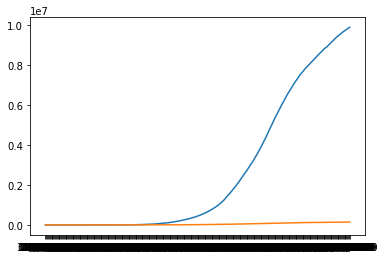

In [12]:
plt.plot(India["date"],India["cases"].cumsum())
plt.plot(India["date"],India["deaths"].cumsum())

<BarContainer object of 349 artists>

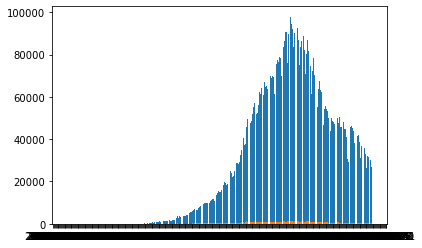

In [13]:
import datetime
import matplotlib.dates as mdates
#dates = ["01/02/2020", "01/03/2020", "01/04/2020"]
y_values = India["cases"]
z_values = India["deaths"]
x_values = [datetime.datetime.strptime(d,"%d/%m/%Y").date() for d in India["date"]]
ax = plt.gca()
formatter = mdates.DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(formatter)
locator = mdates.DayLocator()
ax.xaxis.set_major_locator(locator)
plt.bar(x_values, y_values)
plt.bar(x_values, z_values)

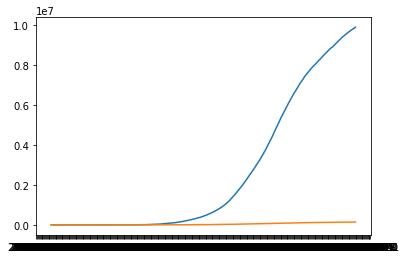

In [14]:
import datetime
import matplotlib.dates as mdates
#dates = ["01/02/2020", "01/03/2020", "01/04/2020"]
y_values = India["cases"].cumsum()
z_values = India["deaths"].cumsum()
x_values = [datetime.datetime.strptime(d,"%d/%m/%Y").date() for d in India["date"]]
ax = plt.gca()
formatter = mdates.DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(formatter)
locator = mdates.DayLocator()
ax.xaxis.set_major_locator(locator)
plt.plot(x_values, y_values)
plt.plot(x_values, z_values)
plt.savefig("cases_n_deaths_cumulative.png")

In [15]:
India

,date,cases,deaths,country,continent,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
27093,31/12/2019,0,0,India,Asia,NaN
27092,01/01/2020,0,0,India,Asia,NaN
27091,02/01/2020,0,0,India,Asia,NaN
27090,03/01/2020,0,0,India,Asia,NaN
27089,04/01/2020,0,0,India,Asia,NaN
...,...,...,...,...,...,...
26749,10/12/2020,31521,412,India,Asia,36.640771
26748,11/12/2020,29398,414,India,Asia,35.639320
26747,12/12/2020,30006,442,India,Asia,34.811169
26746,13/12/2020,30254,391,India,Asia,33.965454


In [16]:
India.to_csv("India_covid.csv", index=False)

In [17]:
India_covid = pd.read_csv("India_covid.csv")
India_covid

,date,cases,deaths,country,continent,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,31/12/2019,0,0,India,Asia,NaN
1,01/01/2020,0,0,India,Asia,NaN
2,02/01/2020,0,0,India,Asia,NaN
3,03/01/2020,0,0,India,Asia,NaN
4,04/01/2020,0,0,India,Asia,NaN
...,...,...,...,...,...,...
344,10/12/2020,31521,412,India,Asia,36.640771
345,11/12/2020,29398,414,India,Asia,35.639320
346,12/12/2020,30006,442,India,Asia,34.811169
347,13/12/2020,30254,391,India,Asia,33.965454


<AxesSubplot:>

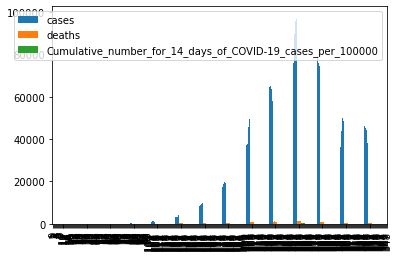

In [18]:
India_covid.plot.bar()

In [19]:
India_covid.drop("country",axis=1,inplace=True)
India_covid.drop("continent",axis=1,inplace=True)
India_covid

,date,cases,deaths,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,31/12/2019,0,0,NaN
1,01/01/2020,0,0,NaN
2,02/01/2020,0,0,NaN
3,03/01/2020,0,0,NaN
4,04/01/2020,0,0,NaN
...,...,...,...,...
344,10/12/2020,31521,412,36.640771
345,11/12/2020,29398,414,35.639320
346,12/12/2020,30006,442,34.811169
347,13/12/2020,30254,391,33.965454


<AxesSubplot:>

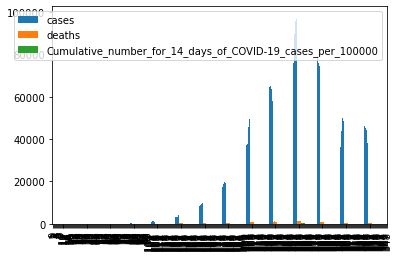

In [20]:
India_covid.plot.bar()

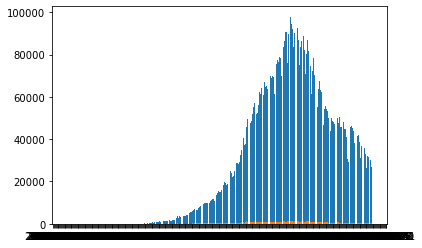

In [21]:
import datetime
import matplotlib.dates as mdates
#dates = ["01/02/2020", "01/03/2020", "01/04/2020"]
y_values = India_covid["cases"]
z_values = India_covid["deaths"]
x_values = [datetime.datetime.strptime(d,"%d/%m/%Y").date() for d in India_covid["date"]]
ax = plt.gca()
formatter = mdates.DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(formatter)
locator = mdates.DayLocator()
ax.xaxis.set_major_locator(locator)
plt.bar(x_values, y_values)
plt.bar(x_values, z_values)
plt.savefig("cases_n_deaths_daily.png")

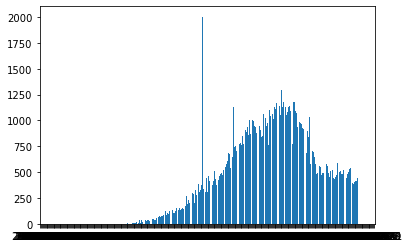

In [22]:
import datetime
import matplotlib.dates as mdates
#dates = ["01/02/2020", "01/03/2020", "01/04/2020"]
#y_values = India_covid["cases"]
z_values = India_covid["deaths"]
x_values = [datetime.datetime.strptime(d,"%d/%m/%Y").date() for d in India_covid["date"]]
ax = plt.gca()
formatter = mdates.DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(formatter)
locator = mdates.DayLocator()
ax.xaxis.set_major_locator(locator)
#plt.plot(x_values, y_values)
plt.bar(x_values, z_values)
plt.savefig("deaths_daily.png")

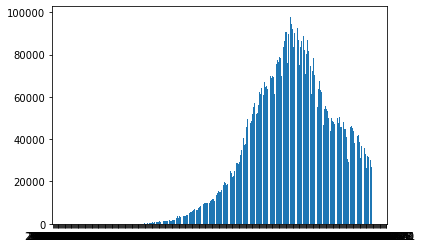

In [23]:
import datetime
import matplotlib.dates as mdates
#dates = ["01/02/2020", "01/03/2020", "01/04/2020"]
y_values = India_covid["cases"]
#z_values = India_covid["deaths"]
x_values = [datetime.datetime.strptime(d,"%d/%m/%Y").date() for d in India_covid["date"]]
ax = plt.gca()
formatter = mdates.DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(formatter)
locator = mdates.DayLocator()
ax.xaxis.set_major_locator(locator)
plt.bar(x_values, y_values)
#plt.plot(x_values, z_values)
plt.savefig("cases_daily.png")